
## PROJETO FINAL DA DISCIPLINA APRENDIZAGEM DE MÁQUINA
### Prof. Leandro Augusto da Silva
#### Aluno: Rafael da Silva Rosa - RA: 10746329

**Arquivo base**: `vendas_montadoras_mes.csv` (coloque-o na mesma pasta do notebook).

#### Objetivo: Predição de vendas de montadoras
Rodar modelos de ML na base histórica de vendas de veículos novos a partir da base da FENABRAVE
https://www.fenabrave.org.br/portalv2/Conteudo/emplacamentos

- Análise exploratória de dados (EDA) (visual e estatística)
- Padronização de strings e categorias
- Remoção de outliers
- Treinar um modelo simples para validar o dataset



### 1️⃣ Setup

In [1]:
#!pip install lightgbm

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

In [3]:
df = pd.read_csv('vendas_montadoras_mes.csv')
df.head()

,Ranking,Fabricante,Quantidade,Participacao,Data
0,1,FIAT,26543,17.07,2022-01-02
1,2,GM,19736,12.69,2022-01-02
2,3,HYUNDAI,16335,10.51,2022-01-02
3,4,JEEP,13926,8.96,2022-01-02
4,5,VW,13886,8.93,2022-01-02


* Separar dados do mês de `JULHO/2025` do Dataset para validação posterior dos modelos

In [4]:
df_validacao = df[(df['Data'] == "2025-07-02")]
df_validacao.head(22)

# Retirar dados do mês de Julho/2025 do dataset de treino
df = df[(df['Data'] != "2025-07-02")]

### 2️⃣ EDA — info(), describe(), contagem de nulos e duplicatas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       864 non-null    int64  
 1   Fabricante    864 non-null    object 
 2   Quantidade    864 non-null    int64  
 3   Participacao  864 non-null    float64
 4   Data          864 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 40.5+ KB


In [6]:
df.describe()

,Ranking,Quantidade,Participacao
count,864.000000,864.000000,864.000000
mean,10.843750,7344.118056,4.811979
std,6.017925,8331.793032,5.452865
min,1.000000,137.000000,0.100000
25%,6.000000,796.000000,0.480000
50%,11.000000,3898.500000,2.315000
75%,16.000000,11147.500000,7.567500
max,21.000000,43015.000000,22.220000


In [7]:
df.isnull().sum()

Ranking         0
Fabricante      0
Quantidade      0
Participacao    0
Data            0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### 3️⃣ Visualizações — distribuições e boxplots

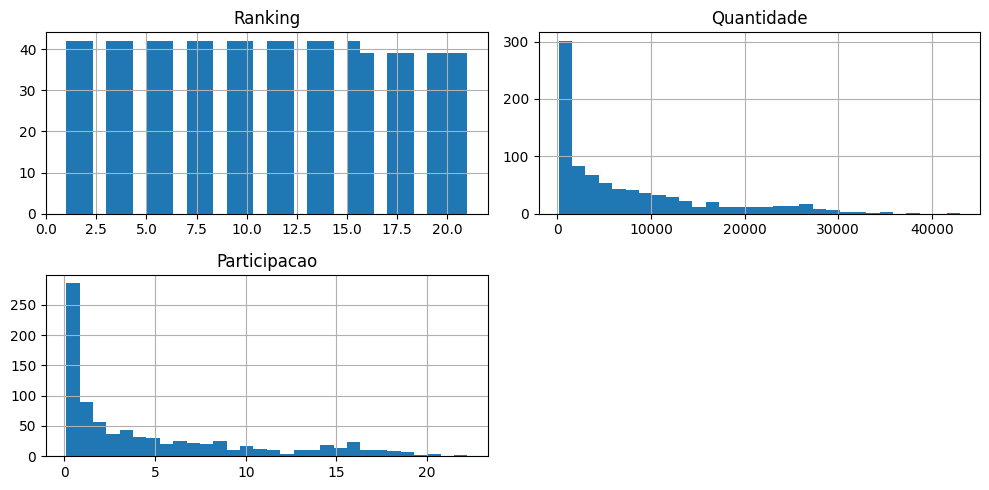

In [9]:
df.hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()


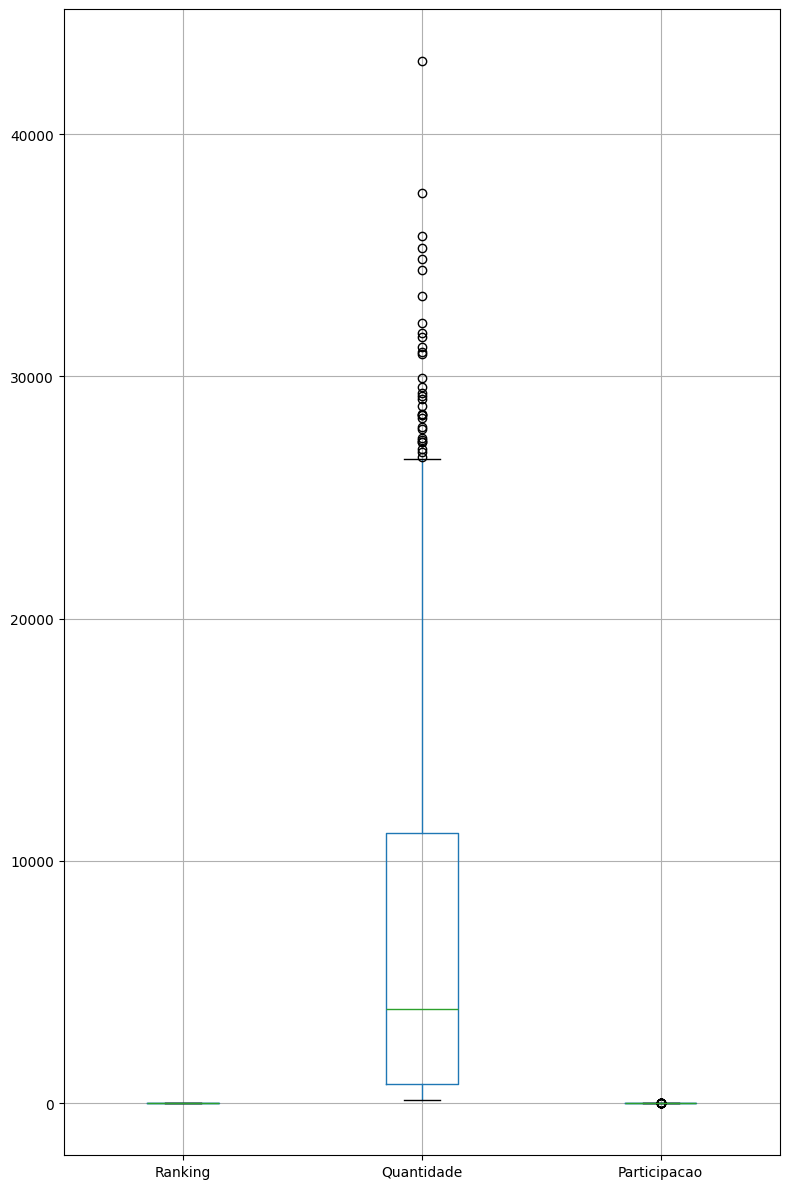

In [10]:
df.boxplot(figsize=(8, 12))
plt.tight_layout()
plt.show()

### 4️⃣ Limpeza — padronização de strings

In [11]:
df['Data'] = df['Data'].str.replace('-', '').str.upper()
df['Data'] = df['Data'].astype('int64')

df['Fabricante'] = df['Fabricante'].str.replace(' ', '_').str.upper()
df['Fabricante'].value_counts()


Fabricante
FIAT          42
GM            42
HYUNDAI       42
JEEP          42
VW            42
TOYOTA        42
RENAULT       42
HONDA         42
NISSAN        42
CAOA_CHERY    42
PEUGEOT       42
CITROEN       42
MITSUBISHI    41
BMW           39
M.BENZ        38
AUDI          38
VOLVO         38
PORSCHE       38
FORD          36
BYD           26
GWM           24
LAND_ROVER    21
KIA           13
RAM            4
JAECOO         2
IVECO          1
MINI           1
Name: count, dtype: int64

### 4️⃣ Transformações
* One-Hot

In [12]:
df_encoded = pd.get_dummies(df, columns=['Fabricante'], drop_first=False, dtype=int)
df_encoded.head(20)

,Ranking,Quantidade,Participacao,Data,Fabricante_AUDI,Fabricante_BMW,Fabricante_BYD,Fabricante_CAOA_CHERY,Fabricante_CITROEN,Fabricante_FIAT,...,Fabricante_MINI,Fabricante_MITSUBISHI,Fabricante_NISSAN,Fabricante_PEUGEOT,Fabricante_PORSCHE,Fabricante_RAM,Fabricante_RENAULT,Fabricante_TOYOTA,Fabricante_VOLVO,Fabricante_VW
0,1,26543,17.07,20220102,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,19736,12.69,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,16335,10.51,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,13926,8.96,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,13886,8.93,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,13661,8.79,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,11943,7.68,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,7089,4.56,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,4985,3.21,20220102,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,10,4928,3.17,20220102,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


* Escalonamento

In [13]:
scaler = MinMaxScaler(feature_range=(-1.2, 1.2))

df_encoded[['Quantidade']] = scaler.fit_transform(df_encoded[['Quantidade']])

df_encoded.head(30)

,Ranking,Quantidade,Participacao,Data,Fabricante_AUDI,Fabricante_BMW,Fabricante_BYD,Fabricante_CAOA_CHERY,Fabricante_CITROEN,Fabricante_FIAT,...,Fabricante_MINI,Fabricante_MITSUBISHI,Fabricante_NISSAN,Fabricante_PEUGEOT,Fabricante_PORSCHE,Fabricante_RAM,Fabricante_RENAULT,Fabricante_TOYOTA,Fabricante_VOLVO,Fabricante_VW
0,1,0.278017,17.07,20220102,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,-0.102990,12.69,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-0.293353,10.51,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,-0.428192,8.96,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,-0.430431,8.93,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,-0.443024,8.79,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,-0.539186,7.68,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,-0.810877,4.56,20220102,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,-0.928644,3.21,20220102,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,10,-0.931835,3.17,20220102,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


* Conversão de data

In [14]:
df_encoded['Data'] = pd.to_datetime(df_encoded['Data'], format='%Y%m%d')

df_encoded['Ano'] = df_encoded['Data'].dt.year
df_encoded['Mes'] = df_encoded['Data'].dt.month
df_encoded['Semana_do_Ano'] = df_encoded['Data'].dt.isocalendar().week
df_encoded['Dia_da_Semana'] = df_encoded['Data'].dt.dayofweek

df_encoded = df_encoded.drop('Data', axis=1)


df_encoded.head(30)


,Ranking,Quantidade,Participacao,Fabricante_AUDI,Fabricante_BMW,Fabricante_BYD,Fabricante_CAOA_CHERY,Fabricante_CITROEN,Fabricante_FIAT,Fabricante_FORD,...,Fabricante_PORSCHE,Fabricante_RAM,Fabricante_RENAULT,Fabricante_TOYOTA,Fabricante_VOLVO,Fabricante_VW,Ano,Mes,Semana_do_Ano,Dia_da_Semana
0,1,0.278017,17.07,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2022,1,52,6
1,2,-0.102990,12.69,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,1,52,6
2,3,-0.293353,10.51,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,1,52,6
3,4,-0.428192,8.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,1,52,6
4,5,-0.430431,8.93,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2022,1,52,6
5,6,-0.443024,8.79,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2022,1,52,6
6,7,-0.539186,7.68,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2022,1,52,6
7,8,-0.810877,4.56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,1,52,6
8,9,-0.928644,3.21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2022,1,52,6
9,10,-0.931835,3.17,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2022,1,52,6


* Tratamento de outliers usando o método do IQR (Interquartile Range)

In [15]:
percentile25 = df_encoded['Quantidade'].quantile(0.25)
percentile75 = df_encoded['Quantidade'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit", upper_limit)
print("Lower limit", lower_limit)


outliers_above = df_encoded[df_encoded['Quantidade'] > upper_limit]
outliers_below = df_encoded[df_encoded['Quantidade'] < lower_limit]

print("Outliers above upper limit:")
print(outliers_above.shape[0])
#outliers_above.head()

print("Outliers below lower limit:")
print(outliers_below.shape[0])

# Remocao dos outliers
df_encoded_no_outliers = df_encoded[df_encoded['Quantidade'] < upper_limit]
df_encoded_no_outliers = df_encoded[df_encoded['Quantidade'] > lower_limit]
df_encoded_no_outliers.shape

Upper limit 0.2853911096599654
Lower limit -2.032216987732636
Outliers above upper limit:
32
Outliers below lower limit:
0


(864, 34)

* Boxplot - Sem outliers

In [16]:
percentile25 = df_encoded['Quantidade'].quantile(0.25)
percentile75 = df_encoded['Quantidade'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit", upper_limit)
print("Lower limit", lower_limit)


outliers_above = df_encoded[df_encoded['Quantidade'] > upper_limit]
outliers_below = df_encoded[df_encoded['Quantidade'] < lower_limit]

print("Outliers above upper limit:")
print(outliers_above.shape[0])
#outliers_above.head()

print("Outliers below lower limit:")
print(outliers_below.shape[0])

# Remocao dos outliers
df_encoded_no_outliers = df_encoded[df_encoded['Quantidade'] < upper_limit]
df_encoded_no_outliers = df_encoded[df_encoded['Quantidade'] > lower_limit]
df_encoded_no_outliers.shape

Upper limit 0.2853911096599654
Lower limit -2.032216987732636
Outliers above upper limit:
32
Outliers below lower limit:
0


(864, 34)

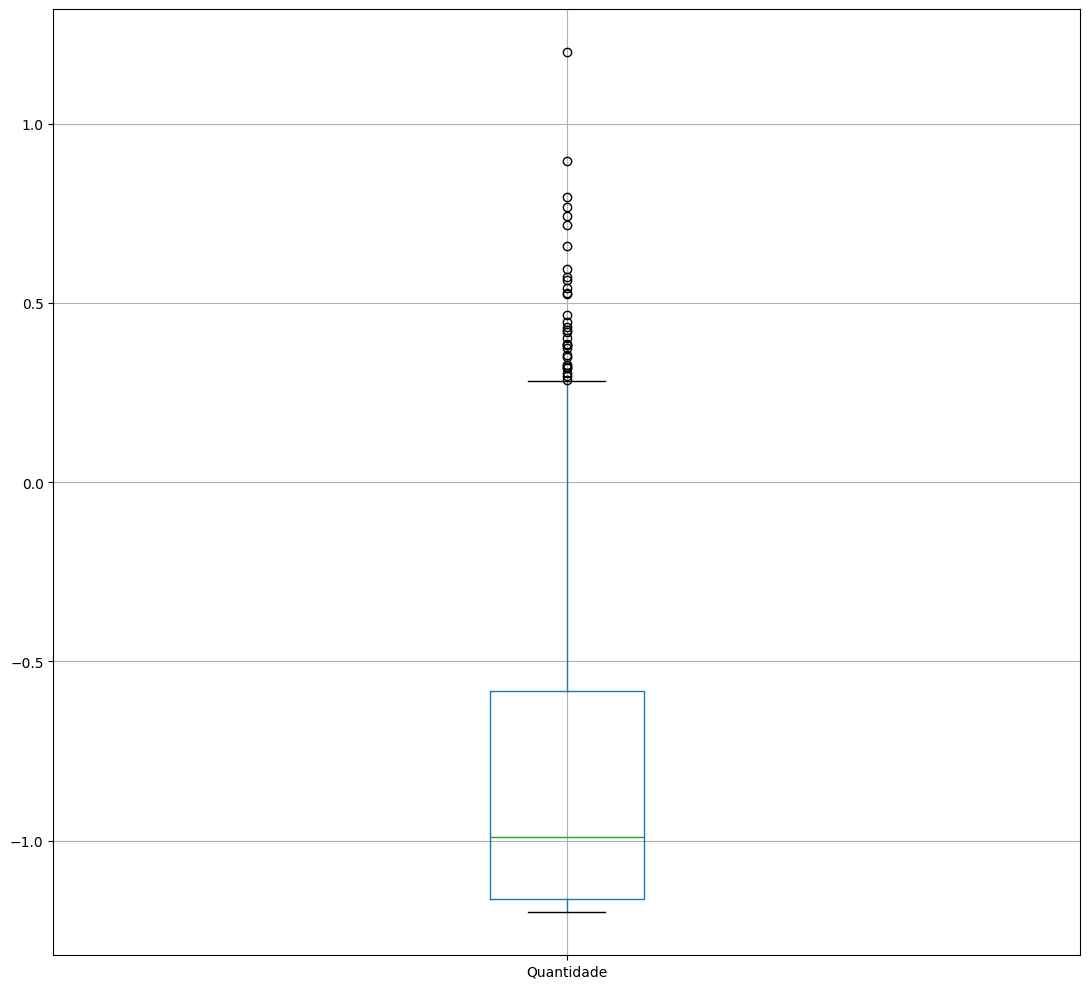

In [17]:
df_encoded_no_outliers[['Quantidade']].boxplot(figsize=(11, 10))
plt.tight_layout()
plt.show()

* Remoção da coluna "Ranking" do treino 
    > Evitar data leakage

In [18]:
X = df_encoded.drop(columns=['Quantidade', 'Ranking'])
y = df_encoded['Quantidade']

### 5️⃣ Separação treino e teste
* Para os modelos `RandomForestRegressor` e `LGBMRegressor`
> - <= 2024: Treino
> - \> 2024: Teste

In [19]:
X_train = X[X['Ano'] <= 2024]
y_train = y[X['Ano'] <= 2024]

X_test = X[X['Ano'] > 2024]
y_test = y[X['Ano'] > 2024]

### 6️⃣ Modelos
    > 6️⃣.1️⃣- RandomForest

In [20]:

# n_estimators é o número de árvores
# random_state mantém a aleatoriedade sob controle.
modelRandomForest = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

modelRandomForest.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
predictions = modelRandomForest.predict(X_test)

* RandomForest - Avaliação de performance

In [22]:
mae = mean_absolute_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

print("--- Métricas na Escala Normalizada (de -1.2 a 1.2) ---")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")

# Reverter a Normalização ---
predictions_original = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Calcular as Métricas com os Valores Originais ---
mae_original = mean_absolute_error(y_test_original, predictions_original)
rmse_original = root_mean_squared_error(y_test_original, predictions_original)

print("--- Métricas na Escala Original (Random Forest) ---")
print(f"Erro Médio Absoluto (MAE) em veículos: {mae_original:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE) em veículos: {rmse_original:.2f}")

--- Métricas na Escala Normalizada (de -1.2 a 1.2) ---
Erro Médio Absoluto (MAE): 0.05
Raiz do Erro Quadrático Médio (RMSE): 0.10
--- Métricas na Escala Original (Random Forest) ---
Erro Médio Absoluto (MAE) em veículos: 825.77
Raiz do Erro Quadrático Médio (RMSE) em veículos: 1742.02


> 6️⃣.2️⃣ Light Gradient Boosting

In [23]:
modelLGBMRegressor = lgb.LGBMRegressor(max_depth=100, n_estimators=300, learning_rate=0.1, num_leaves=131072)
modelLGBMRegressor.fit(X_train, y_train)

y_pred=modelLGBMRegressor.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 738, number of used features: 26
[LightGBM] [Info] Start training from score -0.794532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

* Light Gradient Boosting - Avaliação de performance

In [24]:
print('Training set score: {:.4f}'.format(modelLGBMRegressor.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(modelLGBMRegressor.score(X_test, y_test)))

Training set score: 0.9958
Test set score: 0.9427


> 6️⃣.3️⃣ Multi-layer Perceptron Regressor Neural Network
* ##### Treino e teste ***sem outliers*** para treinamento da rede

In [25]:
X2 = df_encoded_no_outliers.drop(columns=['Quantidade', 'Ranking'])
y2 = df_encoded_no_outliers['Quantidade']

# Separação sequencial
train_size = int(len(X) * 0.8)
X_train, X_test = X2[:train_size], X2[train_size:]
y_train, y_test = y2[:train_size], y2[train_size:]

In [26]:
modelMLPRegressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', max_iter=6000, early_stopping=True, validation_fraction=0.1, learning_rate_init=0.001)
modelMLPRegressor.fit(X_train, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(100, ...)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,6000
,shuffle,True


* Gráfico de erro (loss curve)

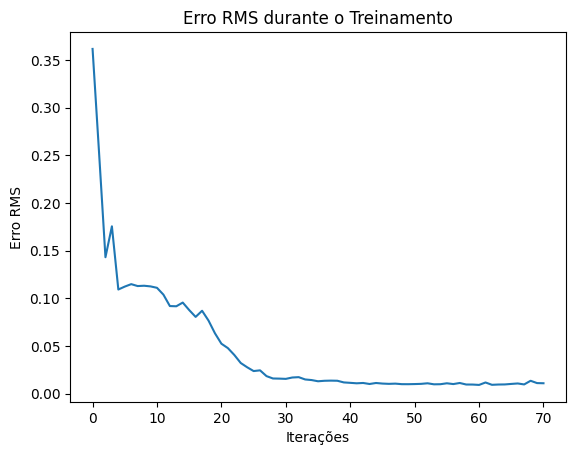

In [27]:
plt.plot(modelMLPRegressor.loss_curve_)
plt.title("Erro RMS durante o Treinamento")
plt.xlabel("Iterações")
plt.ylabel("Erro RMS")
plt.show()

* Plot dados de treinamento

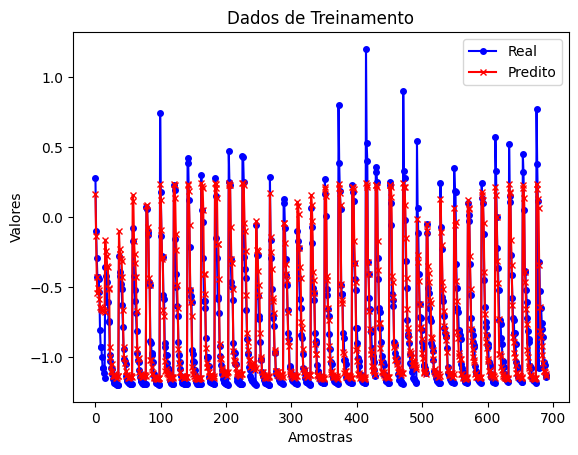

In [28]:
predictions_train = modelMLPRegressor.predict(X_train)
plt.plot(range(len(y_train)), y_train, label="Real", marker='o', linestyle='-', color='blue', markersize=4)
plt.plot(range(len(predictions_train)), predictions_train, label="Predito", marker='x', linestyle='-', color='red', markersize=4)
plt.title("Dados de Treinamento")
plt.xlabel("Amostras")
plt.ylabel("Valores")
plt.legend()
plt.show()

* Dados de teste

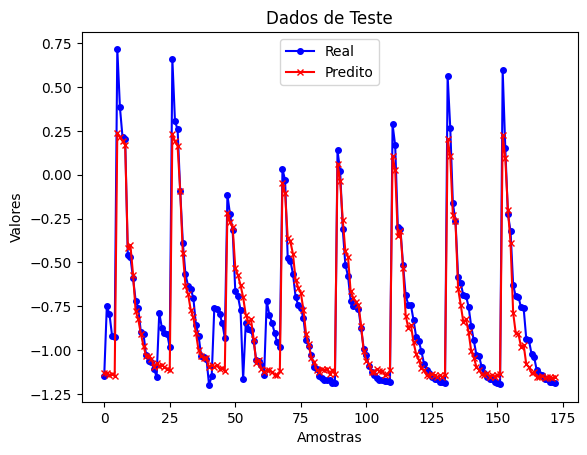

In [29]:
predictions_test = modelMLPRegressor.predict(X_test)
plt.plot(range(len(y_test)), y_test, label="Real", marker='o', linestyle='-', color='blue', markersize=4)
plt.plot(range(len(predictions_test)), predictions_test, label="Predito", marker='x', linestyle='-', color='red', markersize=4)
plt.title("Dados de Teste")
plt.xlabel("Amostras")
plt.ylabel("Valores")
plt.legend()
plt.show()

### 7️⃣ Predição de vendas
* Prever as vendas da montadora ***`VOLKSWAGEM`*** para o mês de ***`JULHO/2025`***

In [30]:
colunas = X_train.columns
dados_para_prever = pd.DataFrame([[0] * len(colunas)], columns=colunas)

# Defina a data da previsão
data_previsao = pd.to_datetime('2025-07-02')

dados_para_prever['Ano'] = data_previsao.year
dados_para_prever['Mes'] = data_previsao.month
dados_para_prever['Semana_do_Ano'] = data_previsao.isocalendar().week
dados_para_prever['Dia_da_Semana'] = data_previsao.dayofweek

# Coluna da montadora específica = 1
# Todas as outras colunas 'Fabricante_*' já estão como 0
dados_para_prever['Fabricante_VW'] = 1

# --- A coluna 'Participacao' ---
# O modelo foi treinado usando a participação de mercado como uma feature.
# Para prever o futuro, você não sabe qual será a participação.
# Solução: Usar a média de participação da VW nos últimos meses.
percentual_participacao_vw = df_encoded[(df_encoded['Fabricante_VW'] == 1) & (df_encoded['Ano'] >= 2024)]['Participacao'].mean()
dados_para_prever['Participacao'] = percentual_participacao_vw


# Garantir que a ordem das colunas seja a mesma do treino
dados_para_prever = dados_para_prever[X_train.columns]


print(f"Média histórica de participação da VW desde 2024: {percentual_participacao_vw:.2f}%")

Média histórica de participação da VW desde 2024: 17.20%


> 7️⃣.1️⃣ Predição do modelo ***`RANDOM FOREST`***

In [31]:
# O resultado será um array com a previsão
previsao_vw_randomForest = modelRandomForest.predict(dados_para_prever)

# Reverter a normalização
previsao_vw_randomForest = scaler.inverse_transform(previsao_vw_randomForest.reshape(-1, 1))
print(f"Previsão de vendas para a VW em {data_previsao.date()}: {previsao_vw_randomForest[0, 0]:.0f} veículos")

Previsão de vendas para a VW em 2025-07-02: 27922 veículos


> 7️⃣.2️⃣ Predição do modelo ***`LIGHT GRADIENT BOOSTING`***

In [32]:
previsao_vw_lgbm = modelLGBMRegressor.predict(dados_para_prever)
previsao_vw_lgbm = scaler.inverse_transform(previsao_vw_lgbm.reshape(-1, 1))
print(f"Previsão de vendas para a VW em {data_previsao.date()}: {previsao_vw_lgbm[0, 0]:.0f} veículos")

Previsão de vendas para a VW em 2025-07-02: 30118 veículos


> 7️⃣.3️⃣ Predição do modelo ***`MULTI-LAYER PERCEPTRON REGRESSOR NEURAL NETWORK`***

In [33]:
previsao_vw_mlp = modelMLPRegressor.predict(dados_para_prever)
previsao_vw_mlp = scaler.inverse_transform(previsao_vw_mlp.reshape(-1, 1))
print(f"Previsão de vendas para a VW em {data_previsao.date()}: {previsao_vw_mlp[0, 0]:.0f} veículos")

Previsão de vendas para a VW em 2025-07-02: 25336 veículos


> 7️⃣.4️⃣ Comparativo entre o resultado dos modelos - VW

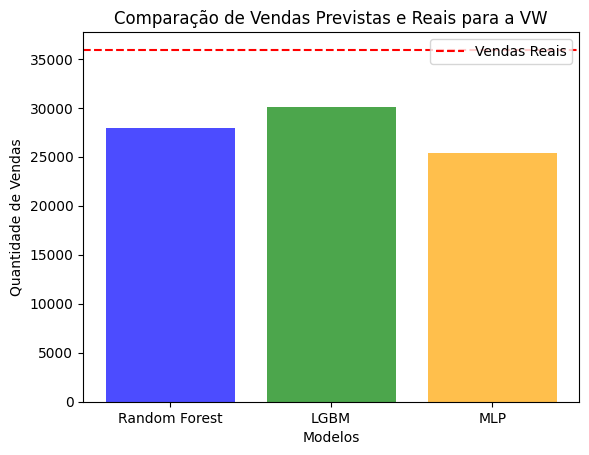

In [34]:
# RESGATAR OS DADOS DO DATASET DE VALIDACAO E COMPARAR COM A RESPOSTA DOS MODELOS
df_validacao_vw = df_validacao[(df_validacao['Fabricante'] == "VW")]
quantidade_vendas_vw = df_validacao_vw["Quantidade"].values


modelos = ['Random Forest', 'LGBM', 'MLP']
previsoes = [previsao_vw_randomForest[0, 0], previsao_vw_lgbm[0, 0], previsao_vw_mlp[0, 0]]

plt.bar(modelos, previsoes, color=['blue', 'green', 'orange'], alpha=0.7)
plt.axhline(y=quantidade_vendas_vw, color='red', linestyle='--', label='Vendas Reais')
plt.title('Comparação de Vendas Previstas e Reais para a VW')
plt.xlabel('Modelos')
plt.ylabel('Quantidade de Vendas')
plt.legend()
plt.show()

### 8️⃣ Predição de vendas
* Prever as vendas da montadora ***`FIAT`*** para o mês de ***`JULHO/2025`***

In [35]:
colunas = X_train.columns
dados_para_prever = pd.DataFrame([[0] * len(colunas)], columns=colunas)

data_previsao = pd.to_datetime('2025-07-02')

dados_para_prever['Ano'] = data_previsao.year
dados_para_prever['Mes'] = data_previsao.month
dados_para_prever['Semana_do_Ano'] = data_previsao.isocalendar().week
dados_para_prever['Dia_da_Semana'] = data_previsao.dayofweek
dados_para_prever['Fabricante_FIAT'] = 1


percentual_participacao_fiat = df_encoded[(df_encoded['Fabricante_FIAT'] == 1) & (df_encoded['Ano'] >= 2024)]['Participacao'].mean()
dados_para_prever['Participacao'] = percentual_participacao_fiat


dados_para_prever = dados_para_prever[X_train.columns]

print(f"Média histórica de participação da FIAT desde 2024: {percentual_participacao_fiat:.2f}%")

previsao_fiat_randomForest = modelRandomForest.predict(dados_para_prever)

previsao_fiat_randomForest = scaler.inverse_transform(previsao_fiat_randomForest.reshape(-1, 1))
print(f"Previsão de vendas para a FIAT em {data_previsao.date()}: {previsao_fiat_randomForest[0, 0]:.0f} veículos")


previsao_fiat_lgbm = modelLGBMRegressor.predict(dados_para_prever)
previsao_fiat_lgbm = scaler.inverse_transform(previsao_fiat_lgbm.reshape(-1, 1))
print(f"Previsão de vendas para a FIAT em {data_previsao.date()}: {previsao_fiat_lgbm[0, 0]:.0f} veículos")


previsao_fiat_mlp = modelMLPRegressor.predict(dados_para_prever)
previsao_fiat_mlp = scaler.inverse_transform(previsao_fiat_mlp.reshape(-1, 1))
print(f"Previsão de vendas para a FIAT em {data_previsao.date()}: {previsao_fiat_mlp[0, 0]:.0f} veículos")

Média histórica de participação da FIAT desde 2024: 15.51%
Previsão de vendas para a FIAT em 2025-07-02: 25216 veículos
Previsão de vendas para a FIAT em 2025-07-02: 26680 veículos
Previsão de vendas para a FIAT em 2025-07-02: 24626 veículos


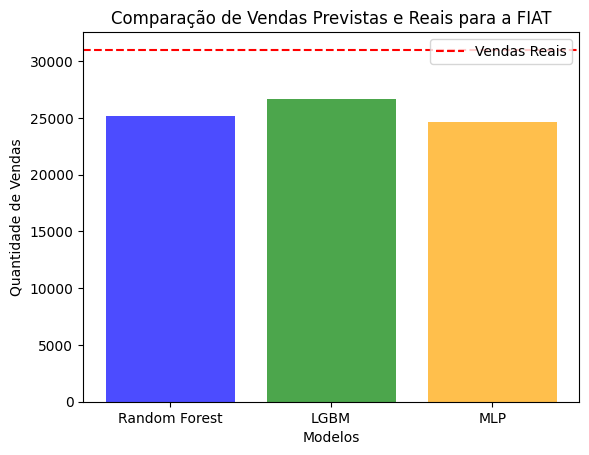

In [36]:
# RESGATAR OS DADOS DO DATASET DE VALIDACAO E COMPARAR COM A RESPOSTA DOS MODELOS
df_validacao_fiat = df_validacao[(df_validacao['Fabricante'] == "FIAT")]
quantidade_vendas_fiat = df_validacao_fiat["Quantidade"].values

modelos = ['Random Forest', 'LGBM', 'MLP']
previsoes = [previsao_fiat_randomForest[0, 0], previsao_fiat_lgbm[0, 0], previsao_fiat_mlp[0, 0]]

plt.bar(modelos, previsoes, color=['blue', 'green', 'orange'], alpha=0.7)
plt.axhline(y=quantidade_vendas_fiat, color='red', linestyle='--', label='Vendas Reais')
plt.title('Comparação de Vendas Previstas e Reais para a FIAT')
plt.xlabel('Modelos')
plt.ylabel('Quantidade de Vendas')
plt.legend()
plt.show()

### 9️⃣ Predição de vendas
* Prever as vendas da montadora ***`TOYOTA`*** para o mês de ***`JULHO/2025`***

Média histórica de participação da TOYOTA desde 2024: 7.70%
Previsão de vendas para a TOYOTA em 2025-07-02: 13388 veículos
Previsão de vendas para a TOYOTA em 2025-07-02: 13421 veículos
Previsão de vendas para a TOYOTA em 2025-07-02: 11673 veículos


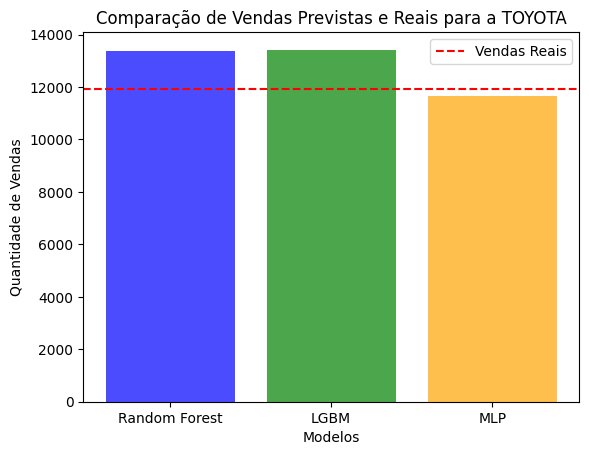

In [37]:
colunas = X_train.columns
dados_para_prever = pd.DataFrame([[0] * len(colunas)], columns=colunas)

data_previsao = pd.to_datetime('2025-07-02')

dados_para_prever['Ano'] = data_previsao.year
dados_para_prever['Mes'] = data_previsao.month
dados_para_prever['Semana_do_Ano'] = data_previsao.isocalendar().week
dados_para_prever['Dia_da_Semana'] = data_previsao.dayofweek
dados_para_prever['Fabricante_TOYOTA'] = 1


percentual_participacao_toyota = df_encoded[(df_encoded['Fabricante_TOYOTA'] == 1) & (df_encoded['Ano'] >= 2024)]['Participacao'].mean()
dados_para_prever['Participacao'] = percentual_participacao_toyota


dados_para_prever = dados_para_prever[X_train.columns]

print(f"Média histórica de participação da TOYOTA desde 2024: {percentual_participacao_toyota:.2f}%")

previsao_toyota_randomForest = modelRandomForest.predict(dados_para_prever)

previsao_toyota_randomForest = scaler.inverse_transform(previsao_toyota_randomForest.reshape(-1, 1))
print(f"Previsão de vendas para a TOYOTA em {data_previsao.date()}: {previsao_toyota_randomForest[0, 0]:.0f} veículos")


previsao_toyota_lgbm = modelLGBMRegressor.predict(dados_para_prever)
previsao_toyota_lgbm = scaler.inverse_transform(previsao_toyota_lgbm.reshape(-1, 1))
print(f"Previsão de vendas para a TOYOTA em {data_previsao.date()}: {previsao_toyota_lgbm[0, 0]:.0f} veículos")


previsao_toyota_mlp = modelMLPRegressor.predict(dados_para_prever)
previsao_toyota_mlp = scaler.inverse_transform(previsao_toyota_mlp.reshape(-1, 1))
print(f"Previsão de vendas para a TOYOTA em {data_previsao.date()}: {previsao_toyota_mlp[0, 0]:.0f} veículos")

df_validacao_toyota = df_validacao[(df_validacao['Fabricante'] == "TOYOTA")]
quantidade_vendas_toyota = df_validacao_toyota["Quantidade"].values

modelos = ['Random Forest', 'LGBM', 'MLP']
previsoes = [previsao_toyota_randomForest[0, 0], previsao_toyota_lgbm[0, 0], previsao_toyota_mlp[0, 0]]

plt.bar(modelos, previsoes, color=['blue', 'green', 'orange'], alpha=0.7)
plt.axhline(y=quantidade_vendas_toyota, color='red', linestyle='--', label='Vendas Reais')
plt.title('Comparação de Vendas Previstas e Reais para a TOYOTA')
plt.xlabel('Modelos')
plt.ylabel('Quantidade de Vendas')
plt.legend()
plt.show()